In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [54]:
data_train_path='Fruits_Vegetables/train'
data_test_path='Fruits_Vegetables/test'
data_val_path='Fruits_Vegetables/validation'

In [56]:
img_width=180
img_height=180

In [58]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)


Found 3115 files belonging to 36 classes.


In [60]:
data_cat=data_train.class_names

In [62]:
data_val= tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 351 files belonging to 36 classes.


In [64]:
data_test= tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


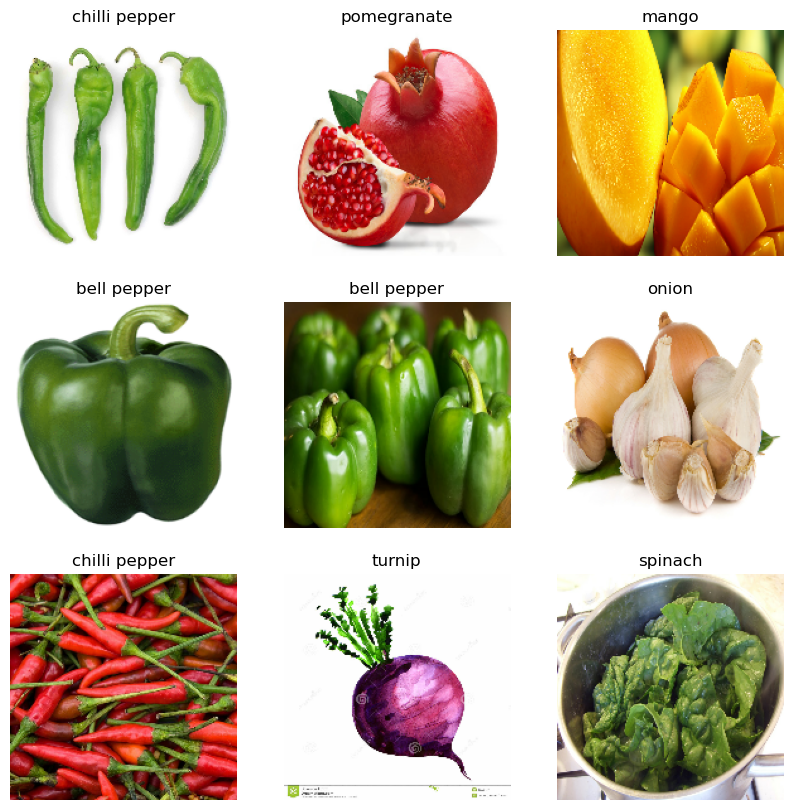

In [66]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [67]:
from tensorflow.keras.models import Sequential

In [70]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [72]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [74]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [76]:
epochs_size=25
history = model.fit(data_train, validation_data=data_val,epochs=epochs_size)


Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 228ms/step - accuracy: 0.0982 - loss: 3.3968 - val_accuracy: 0.3077 - val_loss: 2.1845
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 228ms/step - accuracy: 0.3121 - loss: 2.3366 - val_accuracy: 0.6382 - val_loss: 1.4031
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 231ms/step - accuracy: 0.4880 - loss: 1.7719 - val_accuracy: 0.7407 - val_loss: 0.8997
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 229ms/step - accuracy: 0.6028 - loss: 1.3439 - val_accuracy: 0.8462 - val_loss: 0.5617
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 242ms/step - accuracy: 0.7799 - loss: 0.7632 - val_accuracy: 0.9145 - val_loss: 0.4348
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 237ms/step - accuracy: 0.8562 - loss: 0.4828 - val_accuracy: 0.8860 - val_loss: 0.4813
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 223ms/step - accuracy: 0.8991 - loss: 0.3478 - val_accuracy: 0.9288 - val_loss: 0.4450
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 224ms/step - accuracy: 0.9504 - loss: 0.1907 - val_accu

Text(0.5, 1.0, 'Loss')

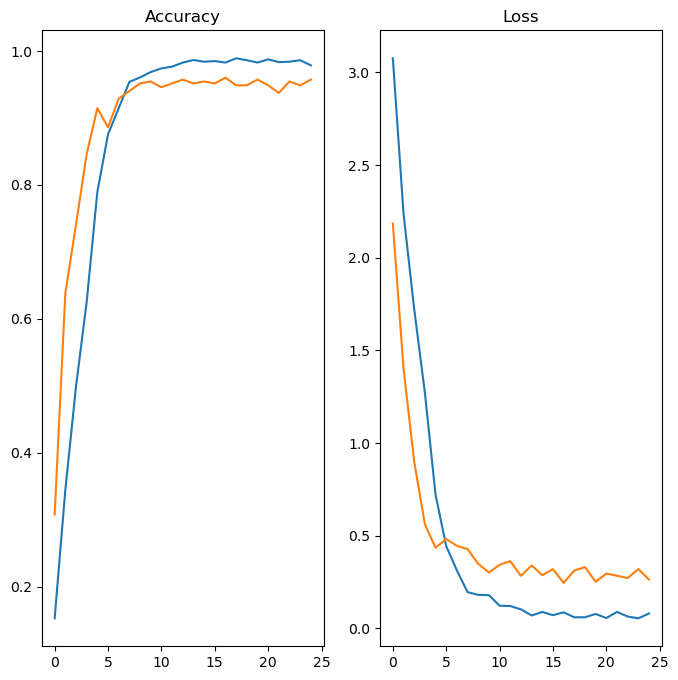

In [80]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'], label='Validation Loss')
plt.title('Loss')


In [100]:
image = 'apple.jpg'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [102]:
predict= model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [104]:
score=tf.nn.softmax(predict)

In [106]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))


Veg/Fruit in image is apple with accuracy of 99.93


In [108]:
model.save('Image_classify.keras')